In [5]:
%matplotlib notebook

import numpy as np
import os
import scipy

from matplotlib import pyplot as plt
from matplotlib import colors
#from osgeo import gdal
from skimage import exposure
from skimage.segmentation import quickshift, felzenszwalb
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

RASTER_DATA_FILE = "data/image/2298119ene2016recorteTT.tif"
TRAIN_DATA_PATH = "data/train/"
TEST_DATA_PATH = "data/test/"

In [21]:
from pylab import *
img=load("dt.npy")
print(img.shape)

(2500, 1000, 7)


In [22]:
segments_quick = quickshift(img, kernel_size=7, max_dist=3, ratio=0.35, convert2lab=False)
n_segments = len(np.unique(segments_quick))
print(n_segments)

26835


<IPython.core.display.Javascript object>


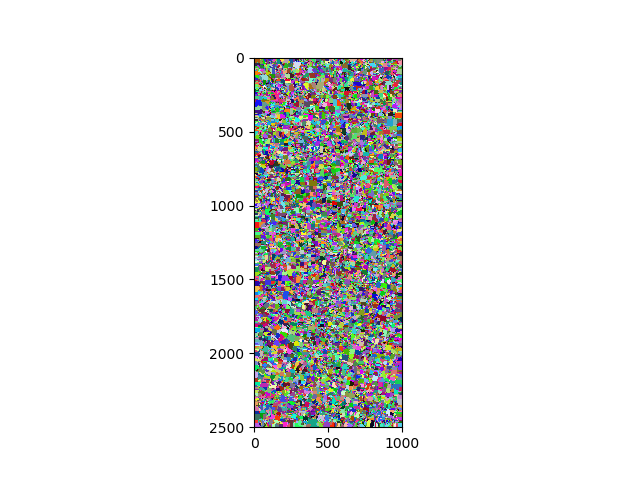

In [6]:
m=np.random.rand(n_segments, 3)

cmap = colors.ListedColormap(m)

plt.figure()
plt.imshow(segments_quick, interpolation='none', cmap=cmap)

In [7]:
n_bands=7
band_segmentation = []
for i in range(n_bands):
    band_segmentation.append(felzenszwalb(img[:, :, i], scale=85, sigma=0.25, min_size=9))

In [9]:
const = [b.max() + 1 for b in band_segmentation]
segmentation = band_segmentation[0]
for i, s in enumerate(band_segmentation[1:]):
    segmentation += s * np.prod(const[:i+1])

_, labels = np.unique(segmentation, return_inverse=True)
segments_felz = labels.reshape(img.shape[:2])

<IPython.core.display.Javascript object>


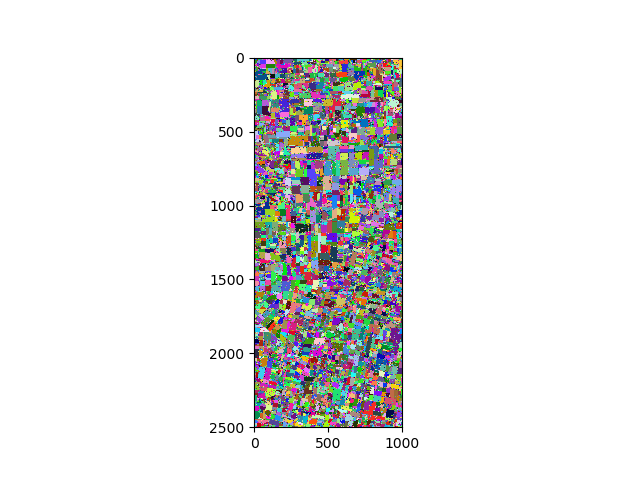

In [10]:
cmap = colors.ListedColormap(np.random.rand(len(np.unique(segments_felz)), 3))
plt.figure()
plt.imshow(segments_felz, interpolation='none', cmap=cmap)

<IPython.core.display.Javascript object>


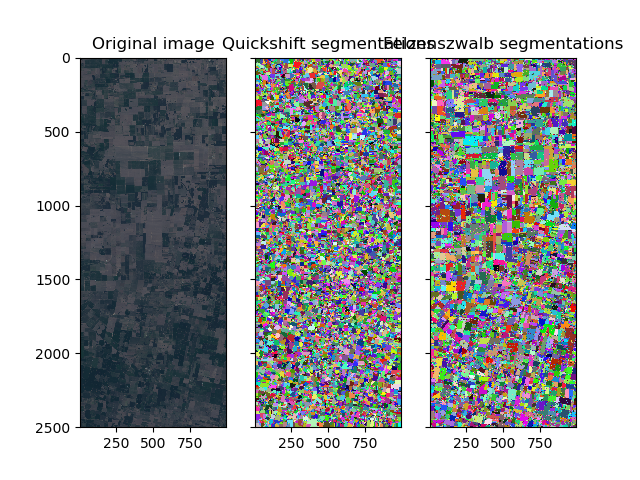

In [12]:
n_segments = max(len(np.unique(s)) for s in [segments_quick, segments_felz])
cmap = colors.ListedColormap(np.random.rand(n_segments, 3))
#SHOW_IMAGES:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
read_data = load("dt.npy")
rgb_img = np.dstack([img[:, :, 3], img[:, :, 2], img[:, :, 1]])
ax1.imshow(rgb_img, interpolation='none')
ax1.set_title('Original image')
ax2.imshow(segments_quick, interpolation='none', cmap=cmap)
ax2.set_title('Quickshift segmentations')
ax3.imshow(segments_felz, interpolation='none', cmap=cmap)
ax3.set_title('Felzenszwalb segmentations')
plt.show()

In [20]:
# We choose the quick segmentation
segments = segments_quick
save("segments",segments)
segment_ids = np.unique(segments)
print("Quick segmentation. %i segments." % len(segment_ids))

Quick segmentation. 26835 segments.
